# Project

**Project Scope**
In this project,the PlantGrowth R dataset will be analyzed. The dataset contains two main variables, a treatment group and the weight of plants within those groups. Your task is to perform t-tests and ANOVA on this dataset while describing the dataset and explaining your work. In doing this you should:
> 1) Download and save the dataset (`PlantGrowth.csv`) to your repository.
> 2) Describe the data set in your notebook.
> 3) Describe what a t-test is, how it works, and what the assumptions are.
> 4) Perform a t-test to determine whether there is a significant difference between the two treatment groups `trt1` and `trt2`.
> 5) Perform ANOVA to determine whether there is a significant difference between the three treatment groups `ctrl`, `trt1`, and `trt2`.
> 6) Explain why it is more appropriate to apply ANOVA rather than several t-tests when analyzing more than two groups.

### Dataset

In [140]:
# loading in modules
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [141]:
# loading in dataset
data = pd.read_csv('PlantGrowth.csv')
print(data.shape)
print(data.head())
print(data['group'].value_counts())

(30, 3)
   rownames  weight group
0         1    4.17  ctrl
1         2    5.58  ctrl
2         3    5.18  ctrl
3         4    6.11  ctrl
4         5    4.50  ctrl
group
ctrl    10
trt1    10
trt2    10
Name: count, dtype: int64


**Decribing the dataset**


The dataset, [PlantGrowth R dataset](https://vincentarelbundock.github.io/Rdatasets/index.html) available from RDatasets contains 30 instanes of 2 columns (`weight` as dried weight of plant and `group` showing the group used in the experiment. In the `group` column there are 10 instanees per group (one control and two treatments). The yields of plant growth for two treatment conditions were compared against a control in an experiment. 

Since there is an index in the dataset, the column rownames is redundant and can be deleted using the drop method. 

While this dataset is housed within [RDatasets](https://vincentarelbundock.github.io/Rdatasets/doc/datasets/PlantGrowth.html), origionally it was presented in (Dobson, 1983). 



In [142]:
data.drop('rownames',
  axis='columns', inplace=True)

print(data.head())
# deletion operation was performed correctly 

   weight group
0    4.17  ctrl
1    5.58  ctrl
2    5.18  ctrl
3    6.11  ctrl
4    4.50  ctrl


In [ ]:
data.groupby(['group']).describe()
# summary statistics 

weight                                                    
       count   mean       std   min     25%    50%     75%   max
group                                                           
ctrl    10.0  5.032  0.583091  4.17  4.5500  5.155  5.2925  6.11
trt1    10.0  4.661  0.793676  3.59  4.2075  4.550  4.8700  6.03
trt2    10.0  5.526  0.442573  4.92  5.2675  5.435  5.7350  6.31

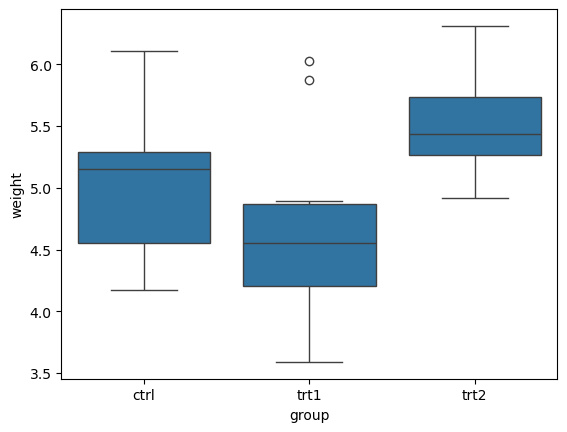

In [167]:
# Initial look at data using a basic boxplot. The boxplot will show the medians (and 1st and 3rd quartile amounst other quartiles)
# https://www.datacamp.com/tutorial/python-boxplots

#sns.boxplot(x='group', y='weight', data=data)
sns.boxplot(x='group', y='weight', data=data);

The median of `trt1` is lower than the `ctrl` group while the `trt2` group median is higher than the `ctrl`. From the above boxplot there are two outliers, i.e., data points that are above the inter-quartile range. 

As the mean and the median (50th quartile above) have a similar value, then this shows that their distribution is normally distrbuted. 

### The t-test

#### What is a t-test?
The t-test (or Student's t-test) is a parametric (assumes normal distribution) statistcal test that is used as part of hypothesis test to compare the means of groups, often times for small sample sizes. Developed by [William Sealy Gosset](https://en.wikipedia.org/wiki/William_Sealy_Gosset) (a chemist at Guniness) to analyse yield on small samples under the pseudonym Student in 1908 (Student, 1908). 

![Photo of William Sealy Gosset](img/William_Sealy_Gosset.jpg)


There are several different types of t-test and include;
- One sample t-test
- Two sample t-test
- Paired t-test

A summary of which is shown below;


**Table 1:** Comparison of t-test (adapted using [JMP](https://www.jmp.com/en_dk/statistics-knowledge-portal/t-test.html) and [Scribber](https://www.scribbr.com/statistics/t-test/))
|T-test type   |One sample	|Two sample	|Paired	| 
|:-------------|:---:|:---:|:---:|
|Also known as        |Within subjects	 |Between subjects   |Paired   |	
|Number of variables        |1	 |2   |2   |	
|Variable type	       |Continuous	 |Continuous, Groups  |Continuous, Groups  |	
|Purpose of test is too...      |Assess if population mean is equal to a specific value or not	 |Assess if the population means for two different groups are equal or not   |Assess if the difference between paired observations for a population is zero or not  |	
|Use test if...     | Machine speed is equal to 175 rpm or not 	 |Machine speed for two machines is equal to 175 rpm or not   |Mean difference of machine speed is equal to 175 rpm or not  |	
|Degrees of freedom       |n-1	 |n<sub>1</sub> + n<sub>2</sub> -2  |n (paired observations)-1     |	



The student t-test can only be used for up 2 groups, but if more groups are needed to test, then an ANOVA (Analysis of variance) can be used. The t-test can either be a two-tailed or one-tailed. In the above example of machine speed, the hypothesis for a one sided t-test can be written as (i.e. the alternative hypothesis can be written if we care if the speed is above **OR** below 165 rpm) (see [here](https://www.scribbr.com/statistics/t-test/)); 

**Null Hypothesis**: H<sub>0</sub>: μd = 165 rpm\
**Alternative Hypothesis**: H<sub>1</sub>: μd < 165 rpm

In this case the alternative hypothesis is testing if the machine rpm is < 165 rpm (i.e., one direction of difference). If one didn't care what direction the differnce of the t-test was then a two-sided test can be used (the alternative showing that machine speed does not equal 165 rpm so it can be above or below 165) and is written as;

**Null Hypothesis**: H<sub>0</sub>: μd = 165 rpm\
**Alternative Hypothesis**: H<sub>1</sub>: μd ≠ 165 rpm


#### How does it work?
As part of a t-test, the variability will be calcualted which is then used to determine if the experimental data is statistically significant at the specific alpha value (generally 0.05) (see [here](https://www.graphpad.com/guides/the-ultimate-guide-to-t-tests)). 



#### What are the assumptions?
There are several assummptions for the t-test, some of which are specific to a particular type of t-test. The assumptions of the t-test are;
- The data are continuous
- The sample has being randomly sampled from the population.
- Two groups or less
- The variability in each group is similar. 
- Samples must be independent (in the case of a paired t-test). 
- Each of the paired measurements must be obtained from the same patient (in the case of a paired t-test).
- The distributions are normally distributed.

if the assumptions are violeted, then a non-parametric method must be used instead such as the Mann-Whitney U Test (see [here](https://statisticsbyjim.com/hypothesis-testing/nonparametric-parametric-tests/)). 



### T-test between `trt1` and `trt2`

Given that there are two groups, and both treatments havn't used the same samples, a two sample t-test would be used in this case. Since we are assessing for a difference we can use a two-sided two sample t-test. In the case of a two sample t-test both the population mean and population standard deviation are estimated from the data (see [here](https://www.jmp.com/en_fi/statistics-knowledge-portal/t-test/two-sample-t-test.html)). 

The null hypothesis is that the underlying population means are the same whereas the alternative hypothesis is that the means are not equal. The null hypothesis is written as:\
**Null Hypothesis**: H<sub>0</sub>: μd = 165 rpm\
**Alternative Hypothesis**: H<sub>1</sub>: μd ≠ 165 rpm\

In [168]:
# subsetting out trt1 and trt2 for plotting 
ctrl, trt1, trt2 = data.loc[data['group'] == 'ctrl'], data.loc[data['group'] == 'trt1'], data.loc[data['group'] == 'trt2']

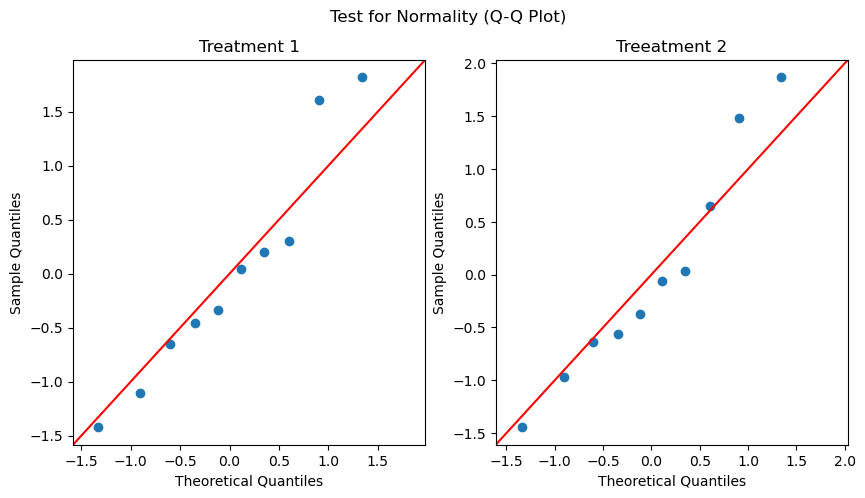

In [169]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Test for Normality (Q-Q Plot)')
sm.qqplot(trt1['weight'],line='45', fit=True, ax=ax[0])
ax[0].set_title('Treatment 1')
sm.qqplot(trt2['weight'],line='45', fit=True, ax=ax[1])
ax[1].set_title('Treeatment 2')
plt.show();

The above Q-Q plot shows tha the data are normally distributed. While a statistial test could have being used, given that there is good agreement between the data points and the red line this is sufficient. Note, that while there is good agreement for both treatments there are two datapoints at the upper right tail that are away from the line, but this is considered normal to have some deviation at the tails. As all other assumptions are valid, a t-test can be performed. 

In [170]:
# The scipy method ttest_ind (two sample t test) was used 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
t_test = stats.ttest_ind(trt1['weight'], trt2['weight'], alternative='two-sided')
print(t_test)

TtestResult(statistic=-3.0100985421243616, pvalue=0.0075184261182198574, df=18.0)


The p-value is 0.0075 at 18 degrees of freedom, which is less than the signifiance level (or α or type I error) of 0.05. We have enough evidene to reject the null hypothesis of the test and have sufficient evidence to say that the mean yield of both treatments is different at the 5% signifance level.

### ANOVA between `ctrl`, `trt1` and `trt2`

The null hypothesis (H<sub>0</sub>) is that the mean yield is the same across all groups whilst the alternative hypothesis (H<sub>1</sub>) is at lest one pair of means are different from each other and is written as 

**Null Hypothesis**: H<sub>0</sub>: μ<sub>1</sub> = μ<sub>2</sub> = μ<sub>3</sub>  
**Alternative Hypothesis**: H<sub>1</sub>: At least one mean (μ<sub>i</sub>) is different

In [171]:
# anova using f_oneway
anova = f_oneway(ctrl['weight'], trt1['weight'], trt2['weight'])
print(anova)

F_onewayResult(statistic=4.846087862380136, pvalue=0.0159099583256229)


As the p-value < 0.05 this means that the null hypothesis (H<sub>0</sub>) is reject and one must conclude that there is evidence in the data to suggest that the two-week exercise program lowers heart-rate. As one way ANOVA cannot say where the difference is occuring, a post-hoc test needs to be completed to determine where the difference is occuring with a common approach is to use TukeyHSD (Tukey’s Honestly-Significant Difference) post-hoc test.

In [172]:
tukey_oneway = pairwise_tukeyhsd(endog = data["weight"], groups = data["group"], alpha=0.05)

# Display the results
tukey_oneway.summary()

#https://www.kaggle.com/code/haseebwar07/hypothesis-testing-and-anova-post-hoc-with-python 

group1,group2,meandiff,p-adj,lower,upper,reject
ctrl,trt1,-0.371,0.3909,-1.0622,0.3202,False
ctrl,trt2,0.494,0.198,-0.1972,1.1852,False
trt1,trt2,0.865,0.012,0.1738,1.5562,True


The TukeyHSD runs pairwise comparisons for each group and will a [p-value](https://www.scribbr.com/statistics/one-way-anova/) with the `p-adj` being used (this is the p-value adjusted for multiple comparisions to reject the rate of Type I error occuring). There was only a p-value < 0.5 which was between `trt1` and `trt2`. 


**Conclusion**

There was a statistically-significant difference in average crop weight according to plnt treatment (F(2)=4.85, p < 0.05). A TukeyHSD post-hoc test revealed significant pairwise differences between treatments 2 and 1, with an average difference of 0.865 (95% CI of 0.173 - 1.556) grams per treatment (p < 0.05).

### ANOVA or Multiple t-tests?

Suppose a researcher had five different groups of data to compare against each other and the researcher would want to compare which one returned the greatest yield of a particular crop (one of the five groups was a control). The first approach the researcher could do would be a t-test for each pair of groups which would result in 10 different t-tests being performed (5 choose 2). In an alternative approach an ANOVA test could be performed to determine if the mean yield for at least two of the treatments was different with a follow up *post-hoc* multiple comparison test to determine between which groups the differene occured (often Tukeys HSD). 

In the case of the t-test, every time this is conducted there is a chance of making a [type I error](https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide-2.php). A type I error is where the null hypothesis is rejected when it is in fact true and for most hypothesis tests is often set as the α or significance level of the hypothesis test (i.e., the probability of a type I error of a hypothesis test is equal to [α](https://web.ma.utexas.edu/users/mks/statmistakes/errortypes.html)). This is often set to 0.05. 

For every subsequent t-test, the probability of a type I error occuring increases. 


If subsequent t-tests are performed k times in this experiment at the α level of 0.05 (one t-test has a type I error rate of 5%) the error rate can be denoted as [below](https://pmc.ncbi.nlm.nih.gov/articles/PMC3916511/pdf/rde-39-74.pdf).
$$1-(0.95)^k$$

Given that 10 t-tests can be performed, the probability of a type I error occuring for 10 t-tests is approximately 0.40

$$1-(0.95)^10 = 0.40 $$


For a comparison two or more group means the ANOVA is the appropriate method instead of [multiple t-tests](https://pmc.ncbi.nlm.nih.gov/articles/PMC3916511/pdf/rde-39-74.pdf). 

For a statistical test the type I error is balanced with the type II error. A type II error is where the null hypothesis is not rejected when in fact the alternate hypothesis is [true](https://web.ma.utexas.edu/users/mks/statmistakes/errortypes.html).

In comparison if one ANOVA test was run only rather than the 10 t-tests, then the probability of a type I error is set at the value of the α level, which is usually set at 5%. 

In [173]:
# type I error for 10 t-tests
type_i_error = 1-pow(0.95, 10)
print(type_i_error)

0.4012630607616213


### Referenes
Dobson, A. J., 1983. An Introduction to Statistical Modelling. London: Chapman and Hall.

Student, 1908. The probable error of a mean. *Biometrika* **6** (1): 1–25. [DOI: https://doi.org/10.1093/biomet/6.1.1](https://doi.org/10.1093/biomet/6.1.1).